# Exploratory Analysis

In [1]:
# Importing Dependencies
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("../Resources/credit_risk.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
person_age                    32581 non-null int64
person_income                 32581 non-null int64
person_home_ownership         32581 non-null object
person_emp_length             31686 non-null float64
loan_intent                   32581 non-null object
loan_grade                    32581 non-null object
loan_amnt                     32581 non-null int64
loan_int_rate                 29465 non-null float64
loan_status                   32581 non-null int64
loan_percent_income           32581 non-null float64
cb_person_default_on_file     32581 non-null object
cb_person_cred_hist_length    32581 non-null int64
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


*Observations:*

1. We can see that there are 12 columns of varying data types. 
2. Some columns have missing entries (person_emp_length and loan_int_rate).

In [2]:
# Separate Categorical and Numerical columns
categorical_columns = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']
numerical_columns = ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_status', 'loan_percent_income', 'cb_person_cred_hist_length']

print(categorical_columns)
print(numerical_columns)

['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']
['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_status', 'loan_percent_income', 'cb_person_cred_hist_length']


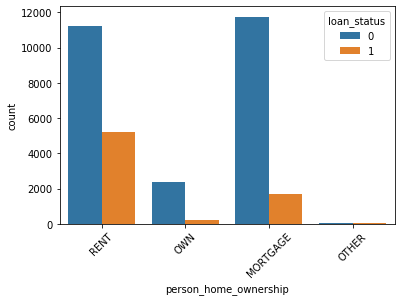

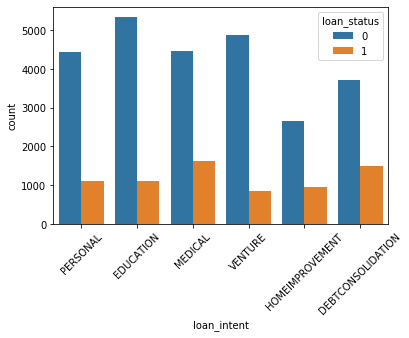

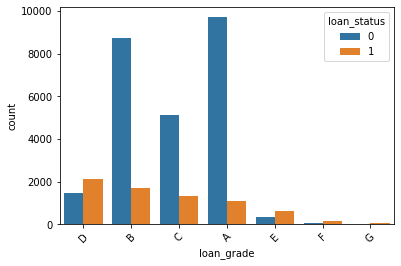

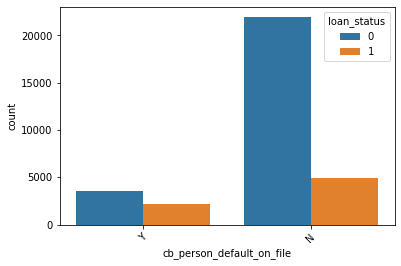

<Figure size 432x288 with 0 Axes>

In [5]:
# Analyze Categorical columns
for cat_col in categorical_columns:
    chart = sns.countplot(hue='loan_status',data=df,x=cat_col)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

    plt.savefig("../Charts/bar_chart_" + cat_col)
    plt.show()
plt.subplots_adjust(hspace=1)

### Plots convey the following information about the dataset:
1. People who are renting or mortgaging their homes recieve more loans, with renters defaulting more commonly.
2. More people recieve loans for education, medical expenses, and venture related reasons than other categories. Medical loans have the most defaults.
3. The higher the grade of the loan (A, B, C, etc.) the less likely it is to default.
4. If a person has a default on file, they are less likely to recieve a loan and more likely to default again.

In [6]:
# Analyze Numerical columns
print(df[numerical_columns].describe())

         person_age  person_income  person_emp_length     loan_amnt  \
count  32581.000000   3.258100e+04       31686.000000  32581.000000   
mean      27.734600   6.607485e+04           4.789686   9589.371106   
std        6.348078   6.198312e+04           4.142630   6322.086646   
min       20.000000   4.000000e+03           0.000000    500.000000   
25%       23.000000   3.850000e+04           2.000000   5000.000000   
50%       26.000000   5.500000e+04           4.000000   8000.000000   
75%       30.000000   7.920000e+04           7.000000  12200.000000   
max      144.000000   6.000000e+06         123.000000  35000.000000   

       loan_int_rate   loan_status  loan_percent_income  \
count   29465.000000  32581.000000         32581.000000   
mean       11.011695      0.218164             0.170203   
std         3.240459      0.413006             0.106782   
min         5.420000      0.000000             0.000000   
25%         7.900000      0.000000             0.090000   
50%   

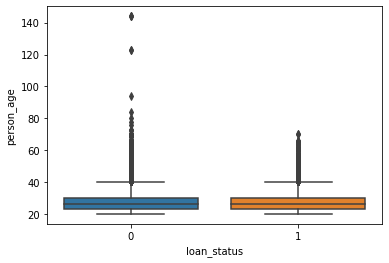

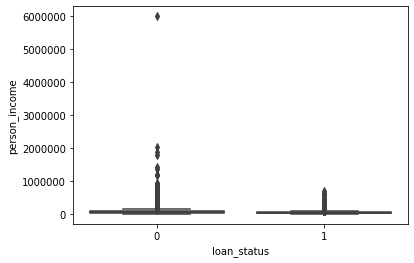

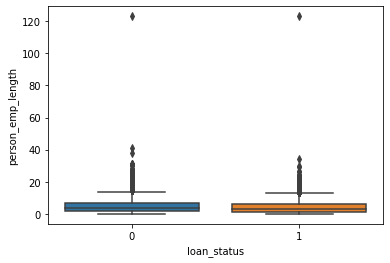

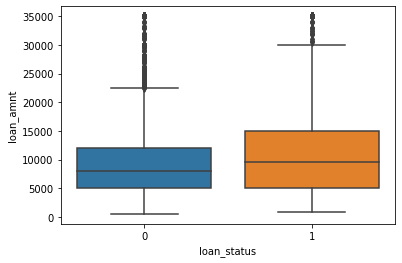

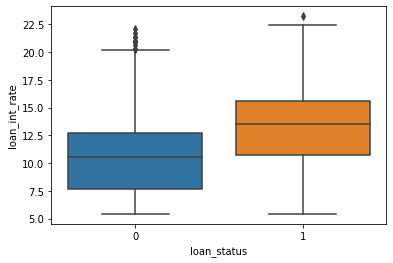

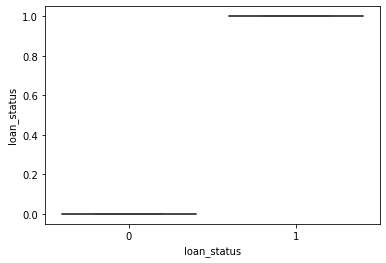

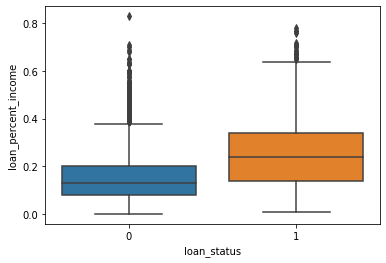

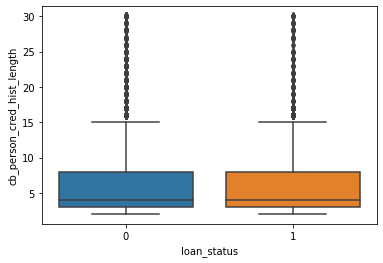

<Figure size 432x288 with 0 Axes>

In [7]:
# Create boxplots for numerical data
for num_col in numerical_columns:
    sns.boxplot(y=num_col,data=df,x='loan_status')
    plt.savefig("../Charts/box_plot_" + num_col)
    plt.show()
plt.subplots_adjust(hspace=1)

In [10]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = "credit_risk_dataset.csv"
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    corr.style.background_gradient(cmap='coolwarm')
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.savefig("../Charts/correlation_matrix")
    plt.show()

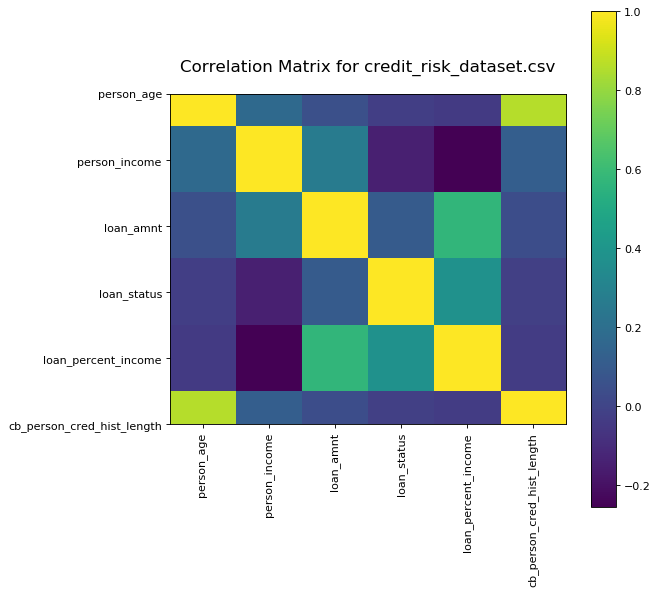

In [11]:
plotCorrelationMatrix(df, 8)